In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mask_rcnn
import mask_rcnn_utils
import eye_segmentation
import cv2
from tqdm import tqdm

import tensorflow as tf
import keras
import keras.backend as K
import keras.layers as KL
import keras.engine as KE
import keras.models as KM
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
# segmentation dataset
DATASET_DIR = '/home/jjonathanmak/cs271proj/Semantic_Segmentation_Dataset' # replace with your path
TRAIN_IMAGE_DIR = DATASET_DIR + '/train/images'
TRAIN_LABELS_DIR = DATASET_DIR + '/train/labels'
VAL_IMAGE_DIR = DATASET_DIR + '/validation/images'
VAL_LABELS_DIR = DATASET_DIR + '/validation/labels'
TEST_IMAGE_DIR = DATASET_DIR + '/test/images'

8916
000000002610.npy


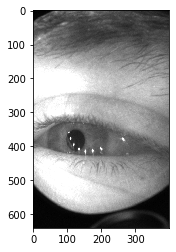

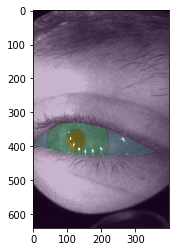

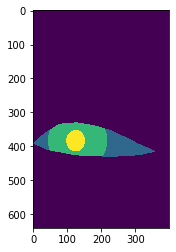

In [3]:
assert (len(os.listdir(TRAIN_IMAGE_DIR)) == len(os.listdir(TRAIN_LABELS_DIR))) # 8916

images = sorted(os.listdir(TRAIN_IMAGE_DIR))
labels = sorted(os.listdir(TRAIN_LABELS_DIR))
print(len(images))

# count = 0
for i in range(len(images)):
    print(labels[i])
    image = load_img(TRAIN_IMAGE_DIR+'/'+images[i])
    
    label = np.load(TRAIN_LABELS_DIR+'/'+labels[i])
    plt.figure()
    plt.imshow(image)
    plt.savefig('/home/jjonathanmak/cs271proj/image1.png')
    plt.figure()
    
    plt.imshow(image)
    plt.imshow(label, alpha=0.3)
    
    plt.figure()
 
    plt.imshow(label)
    plt.savefig('/home/jjonathanmak/cs271proj/label1.png')
    break
#     count += 1
#     if count == 3: break

In [6]:
def load_data(IMAGE_DIR, LABEL_DIR):

    images = []
    image_list = sorted(os.listdir(IMAGE_DIR))
    if LABEL_DIR:
        labels = []
        label_list = sorted(os.listdir(LABEL_DIR))

    for file in tqdm(range(len(image_list))):

        image_path = IMAGE_DIR +'/'+image_list[i]
        
        # image is duplicated across channels, take 1st channel
        img = img_to_array(load_img(image_path), dtype=np.uint8)
         
        images.append(img[:, :, 0])
        
        if LABEL_DIR:
            label_path = LABEL_DIR +'/'+label_list[i]
            label = np.load(label_path)
            labels.append(label)

    if LABEL_DIR:
        return np.array(images), np.array(labels)
    else:
        return np.array(images)

train_images, train_labels = load_data(TRAIN_IMAGE_DIR, TRAIN_LABELS_DIR)
val_images, val_labels = load_data(VAL_IMAGE_DIR, VAL_LABELS_DIR)
test_images = load_data(TEST_IMAGE_DIR, None)

print('Train images: ', train_images.shape)
print('Train labels: ', train_labels.shape)
print('Val images: ', val_images.shape)
print('Val labels: ', val_labels.shape)
print('Test images: ', test_images.shape)

100%|██████████| 1440/1440 [00:05<00:00, 253.72it/s]


Train images:  (8916, 640, 400)
Train labels:  (8916, 640, 400)
Val images:  (2403, 640, 400)
Val labels:  (2403, 640, 400)
Test images:  (1440, 640, 400)


In [14]:
BATCH_SIZE = 8

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))

In [15]:
# Train
model = eye_segmentation.train_mrcnn(train_dataset, val_dataset, load_last=False)

Train network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: logs/eye_segmentation20200228T2229/mask_rcnn_eye_segmentation_{epoch:04d}.h5
In model:  rpn_model


/home/jjonathanmak/miniconda3/envs/biods220-env/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/jjonathanmak/miniconda3/envs/biods220-env/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/jjonathanmak/miniconda3/envs/biods220-env/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'